IMPORTACOES

In [2]:
import pandas as pd
import sidrapy
import matplotlib.pyplot as plt
import seaborn as sns

REQUISICAO

In [3]:
# https://apisidra.ibge.gov.br/values/t/4660/n1/all/n2/all/v/all/p/all/d/v5937%201,v5941%201
data = sidrapy.get_table(table_code='4660', territorial_level='2', ibge_territorial_code='all', territorial_sel='all', period='all')

DEFININDO HEADERS

In [4]:
data.columns = data.iloc[0]

DROPS

In [5]:
data.drop(0, inplace=True)

In [6]:
data = data.drop(columns=['Nível Territorial (Código)', 'Nível Territorial'])

CONVERTENDO VALORES

In [7]:
data['Ano'] = pd.to_datetime(data['Ano'])

In [8]:
data['Valor'] = data['Valor'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [9]:
data = data.dropna(subset='Valor')

In [10]:
print(f'valores convertidos para nan: {data['Valor'].isna().sum()}')

valores convertidos para nan: 0


DEFININDO DFS

In [11]:
df_real = data[data['Variável (Código)'] == '5933'].copy()
df_nominal = data[data['Variável (Código)'] == '5929'].copy()
df_variacao = data[data['Variável (Código)'] == '5941'].copy()

In [12]:
print(len(df_real))
print(len(df_nominal))
print(len(df_variacao))

65
65
65


VISUALIZACAO

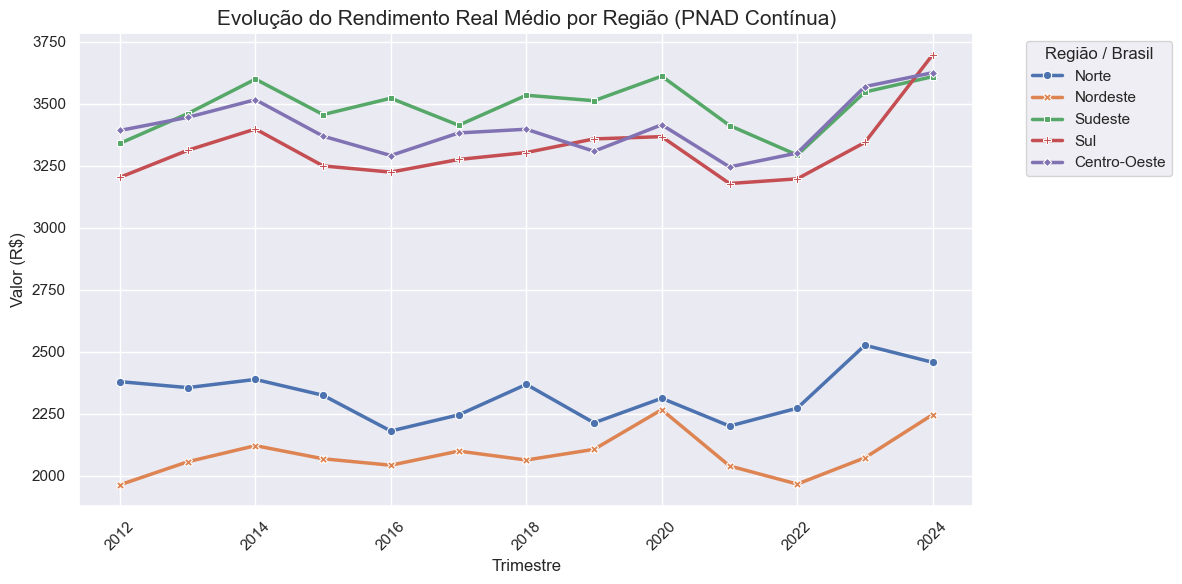

In [13]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=df_real, x='Ano', y='Valor', hue='Grande Região', markers=True, style='Grande Região', linewidth=2.5, dashes=False)
plt.title('Evolução do Rendimento Real Médio por Região (PNAD Contínua)', fontsize=15)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Valor (R$)', fontsize=12)
plt.xticks(rotation=45) # Inclina as datas para não sobrepor
plt.legend(title='Região / Brasil', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Evolução do Rendimento Real Médio por Região (PNAD Contínua)', dpi=300, bbox_inches='tight')
plt.show()

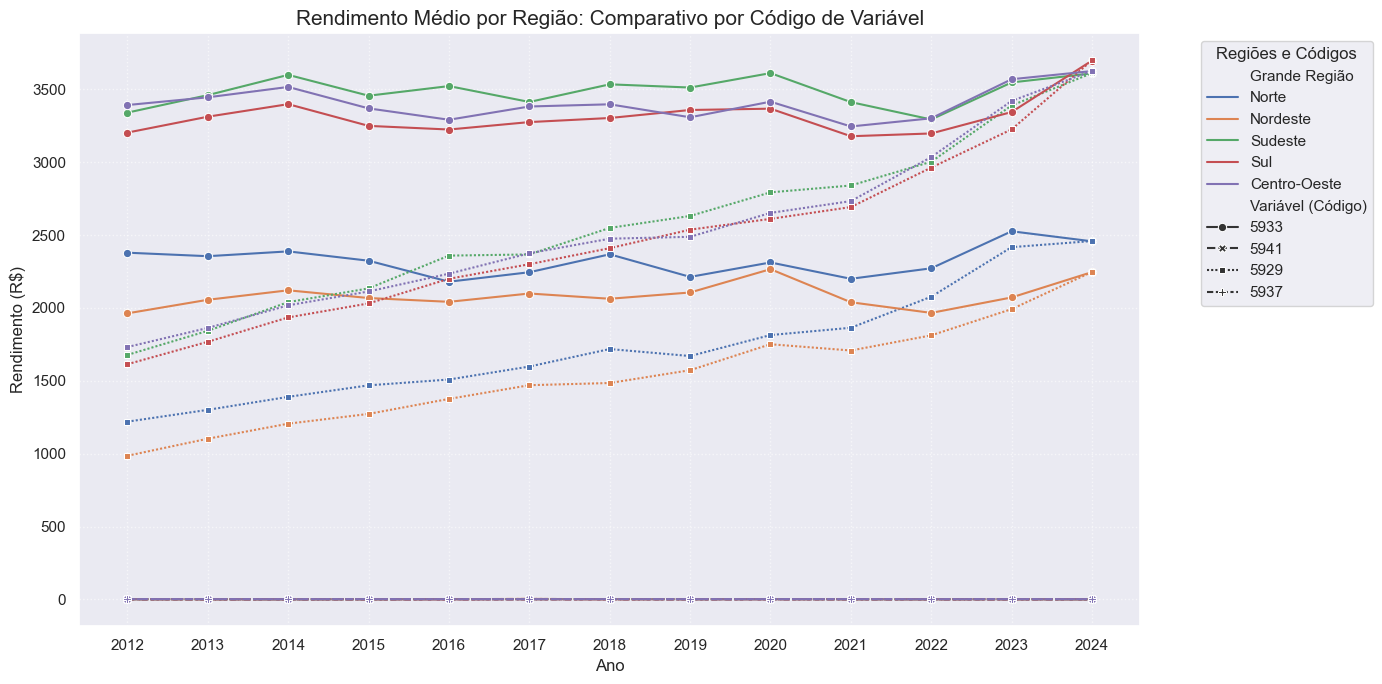

In [14]:
plt.figure(figsize=(14, 7))

sns.lineplot(
    data=data, 
    x='Ano (Código)', 
    y='Valor', 
    hue='Grande Região', 
    style='Variável (Código)', 
    markers=True
)

plt.title('Rendimento Médio por Região: Comparativo por Código de Variável', fontsize=15)
plt.ylabel('Rendimento (R$)')
plt.xlabel('Ano')

plt.legend(title='Regiões e Códigos', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig('comparativo_regioes_codigos.png')

C:\Users\ajose\AppData\Local\Temp\ipykernel_5084\893757647.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_crescimento, x='Crescimento (%)', y='Grande Região', palette='viridis')


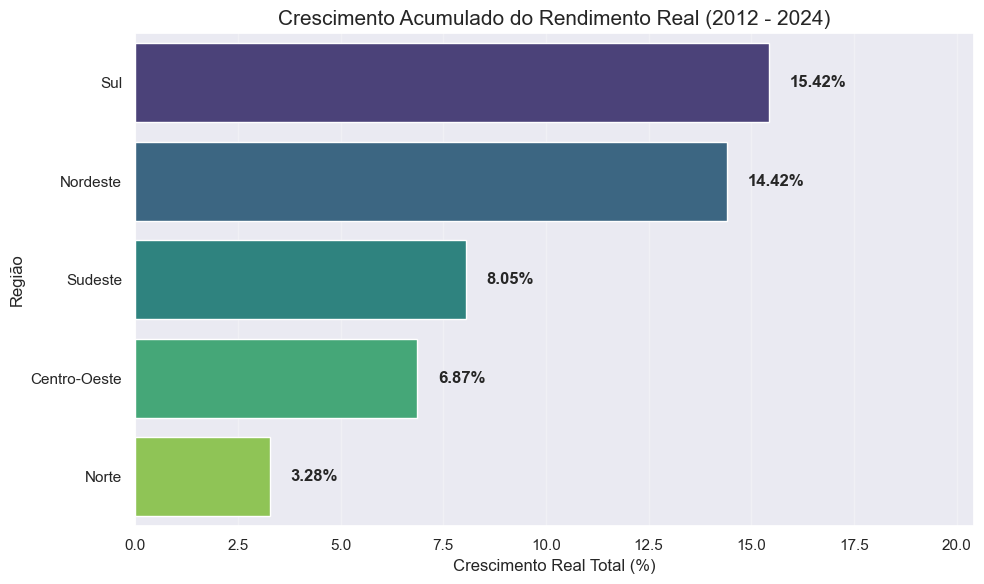

In [15]:
media_2012 = df_real[df_real['Ano (Código)'] == '2012'].groupby('Grande Região')['Valor'].mean()
media_2024 = df_real[df_real['Ano (Código)'] == '2024'].groupby('Grande Região')['Valor'].mean()

crescimento_total = ((media_2024 / media_2012) - 1) * 100
df_crescimento = crescimento_total.reset_index().rename(columns={'Valor': 'Crescimento (%)'})
df_crescimento = df_crescimento.sort_values('Crescimento (%)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_crescimento, x='Crescimento (%)', y='Grande Região', palette='viridis')

for i, valor in enumerate(df_crescimento['Crescimento (%)']):
    plt.text(valor + 0.5, i, f'{valor:.2f}%', va='center', fontweight='bold')

plt.title('Crescimento Acumulado do Rendimento Real (2012 - 2024)', fontsize=15)
plt.xlabel('Crescimento Real Total (%)')
plt.ylabel('Região')
plt.xlim(0, df_crescimento['Crescimento (%)'].max() + 5) 
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('crescimento_real_acumulado.png', dpi=300)
plt.show()

Relatório Final: Dinâmica e Evolução do Rendimento Regional (2012-2024)
1. O Fenômeno da Ilusão Monetária
A análise da Tabela 4660 evidencia um distanciamento progressivo entre o Rendimento Nominal (valor bruto) e o Rendimento Real (poder de compra). Enquanto as curvas nominais apresentam uma inclinação ascendente agressiva, as curvas reais mostram uma trajetória muito mais horizontal.

Conclusão: Isso comprova que o aumento numérico no contracheque do brasileiro foi, em grande parte, neutralizado pela inflação. O trabalhador recebe mais "notas", mas o poder de consumo efetivo não acompanhou esse ritmo na mesma proporção.

2. Eficiência Regional e Crescimento Real
O gráfico de crescimento acumulado traz o veredito sobre qual região melhor protegeu a renda do trabalhador contra a inflação nos últimos 12 anos:

Liderança do Sul: Com um crescimento real de 15,42%, o Sul consolidou-se como a região de maior eficiência econômica, unindo altos valores absolutos com a maior taxa de ganho real do país.

A Surpresa do Nordeste: Apesar de possuir o menor rendimento absoluto, o Nordeste apresentou o segundo maior crescimento real (14,42%), superando o Sudeste e o Centro-Oeste em termos de evolução proporcional.

Maturidade do Sudeste: Com um crescimento de 8,05%, o Sudeste demonstra os sinais de uma economia madura, onde o alto custo de vida impõe um "teto" mais baixo para o crescimento do rendimento real comparado às novas fronteiras econômicas.

3. Abismo e Convergência
A visualização mantém a clareza sobre a dualidade socioeconômica do Brasil:

Bloco de Alta Renda: Sul, Sudeste e Centro-Oeste operam em um patamar consolidado acima de R$ 3.000,00.

Bloco de Baixa Renda: Norte e Nordeste flutuam na faixa de R$ 2.000,00 a R$ 2.500,00.

Insight Final: O crescimento real superior do Nordeste frente ao Sudeste sugere um processo lento de convergência, onde as desigualdades regionais começam a ser levemente reduzidas pela valorização da base salarial e recuperação do mercado de trabalho formal.